In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import mode


In [44]:
df=pd.read_csv("data\diamonds.csv")

In [45]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [46]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [47]:
df.shape

(53940, 10)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [49]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [50]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [51]:
# make a split of numerical and categorical columns
numerical = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
categorical = df.loc[:, ~df.columns.isin(numerical)].columns

In [52]:
numerical

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [53]:
categorical

Index(['cut', 'color', 'clarity'], dtype='object')

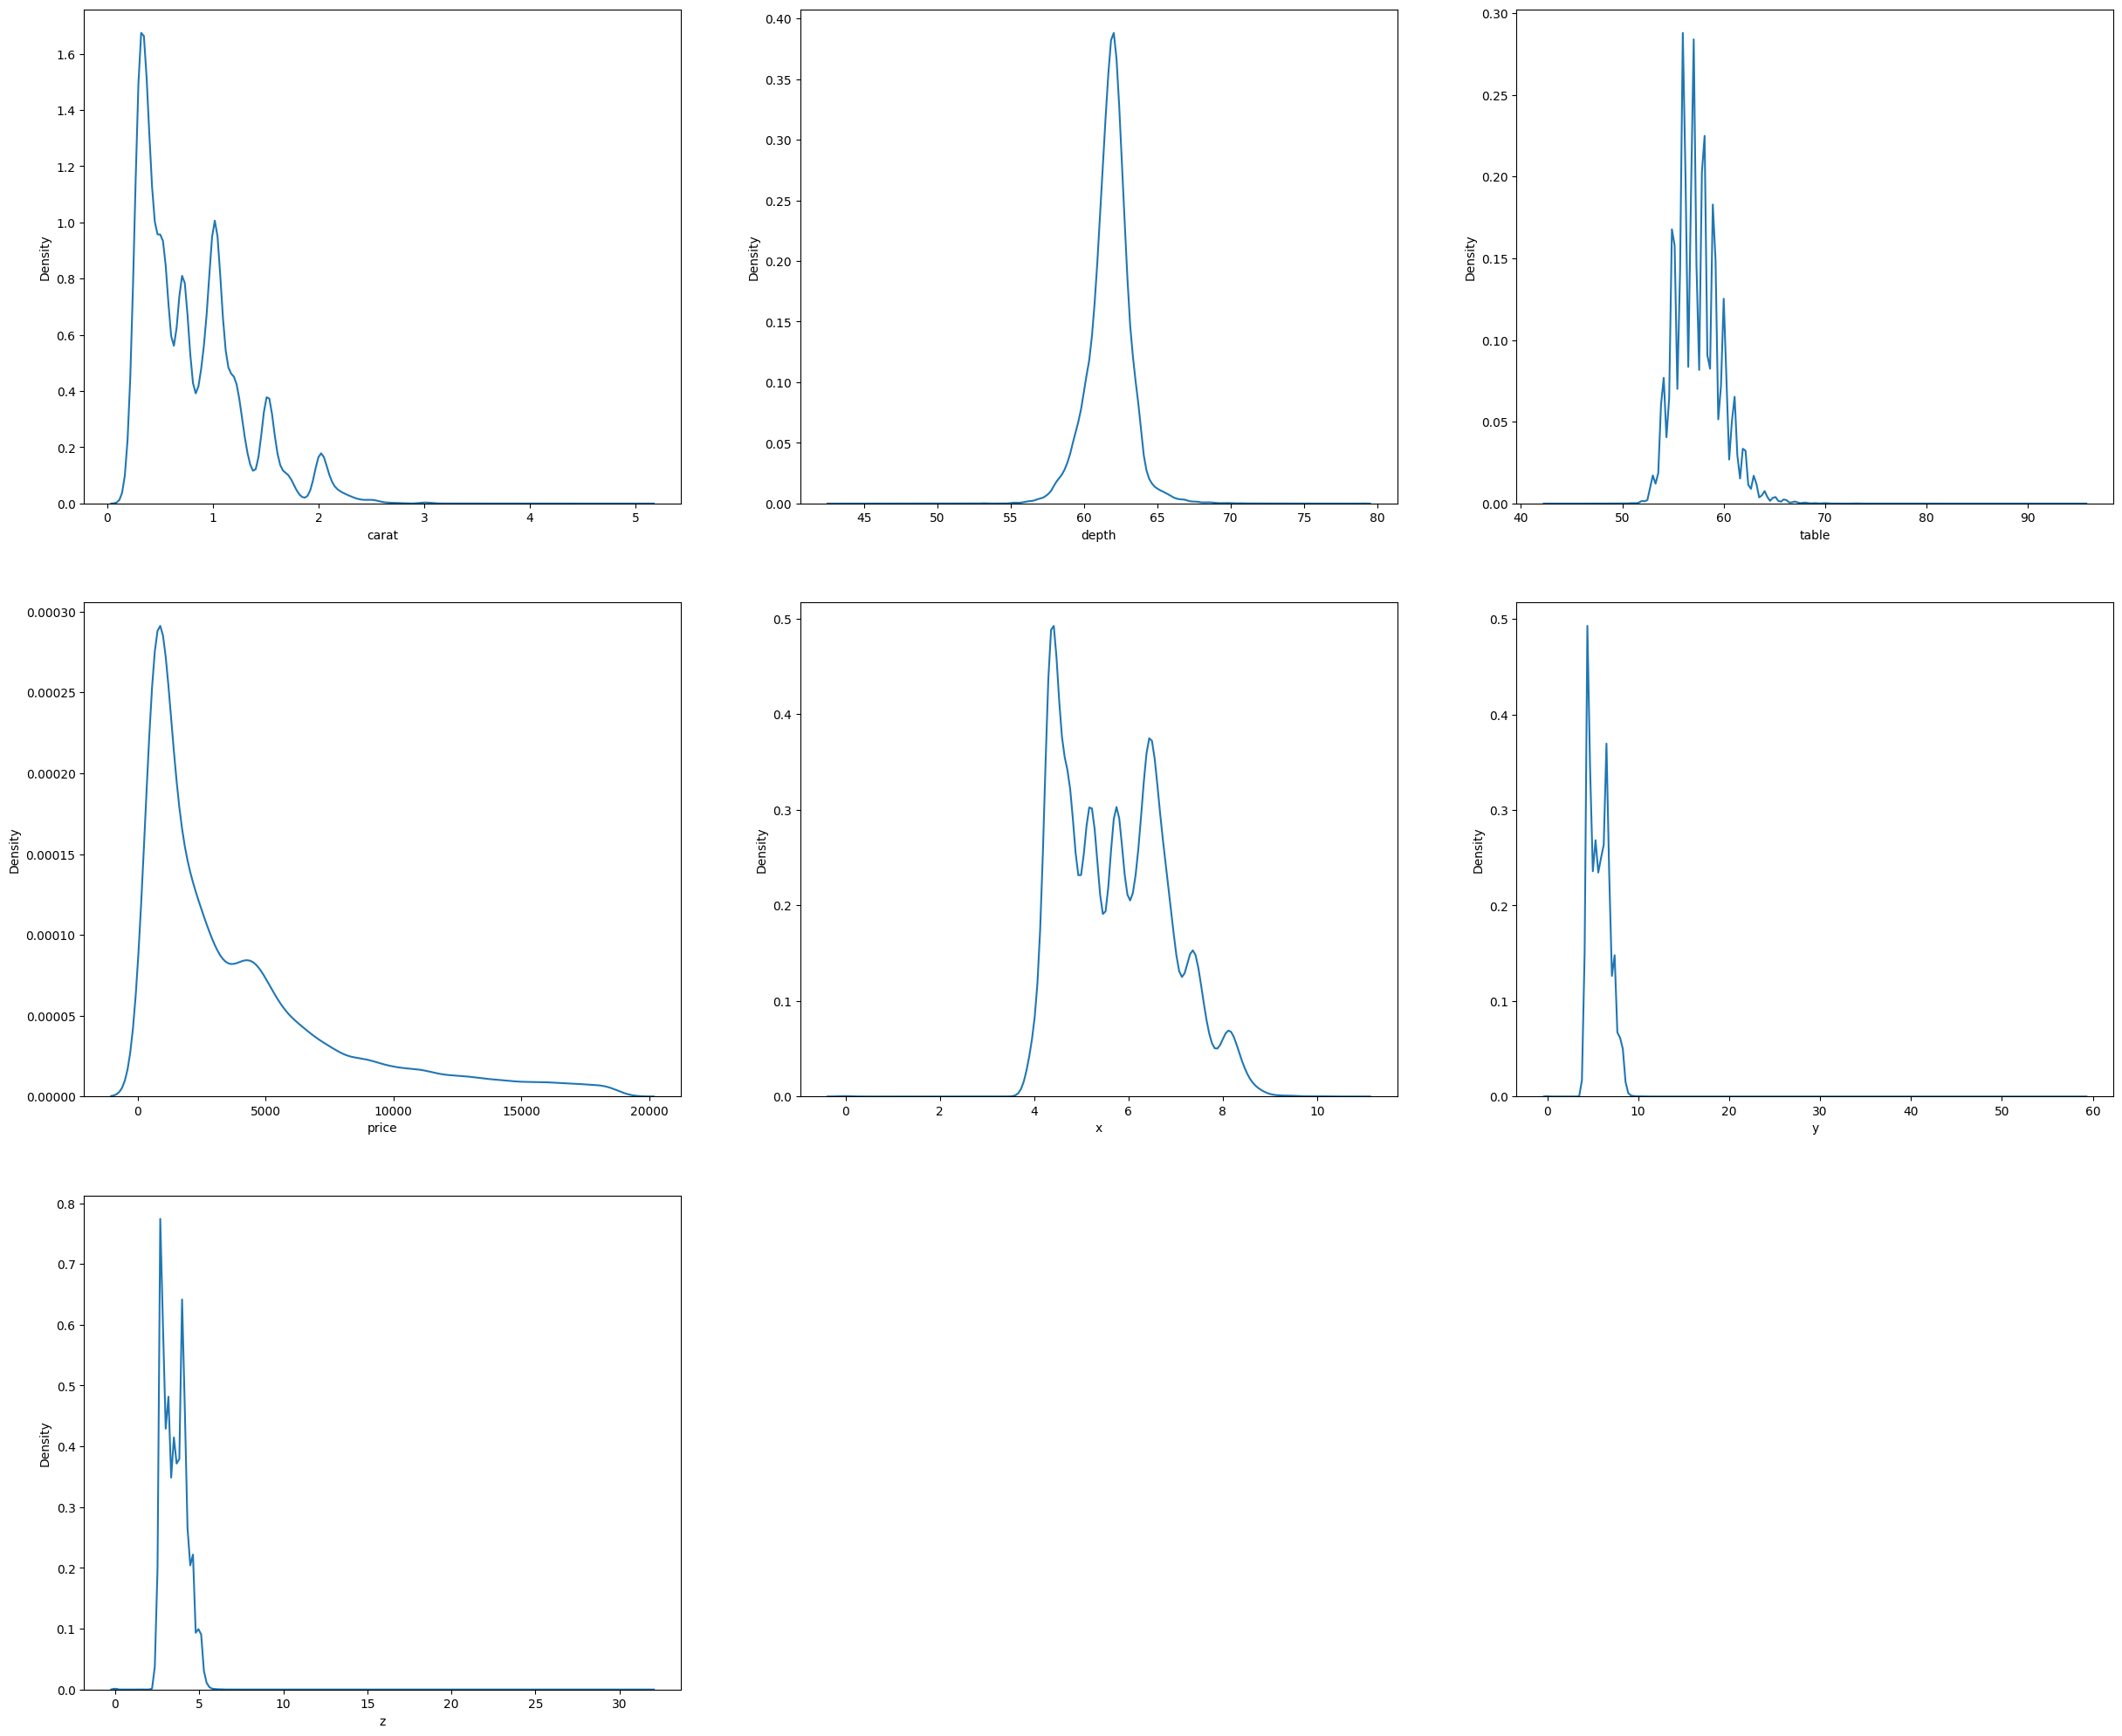

In [54]:
# plot the distplot for numerical columns
plt.figure(figsize = (30, 25))

for i, col in enumerate(numerical):
    plt.subplot(3, 3, i+1)
    sns.distplot(df[col], hist = False)

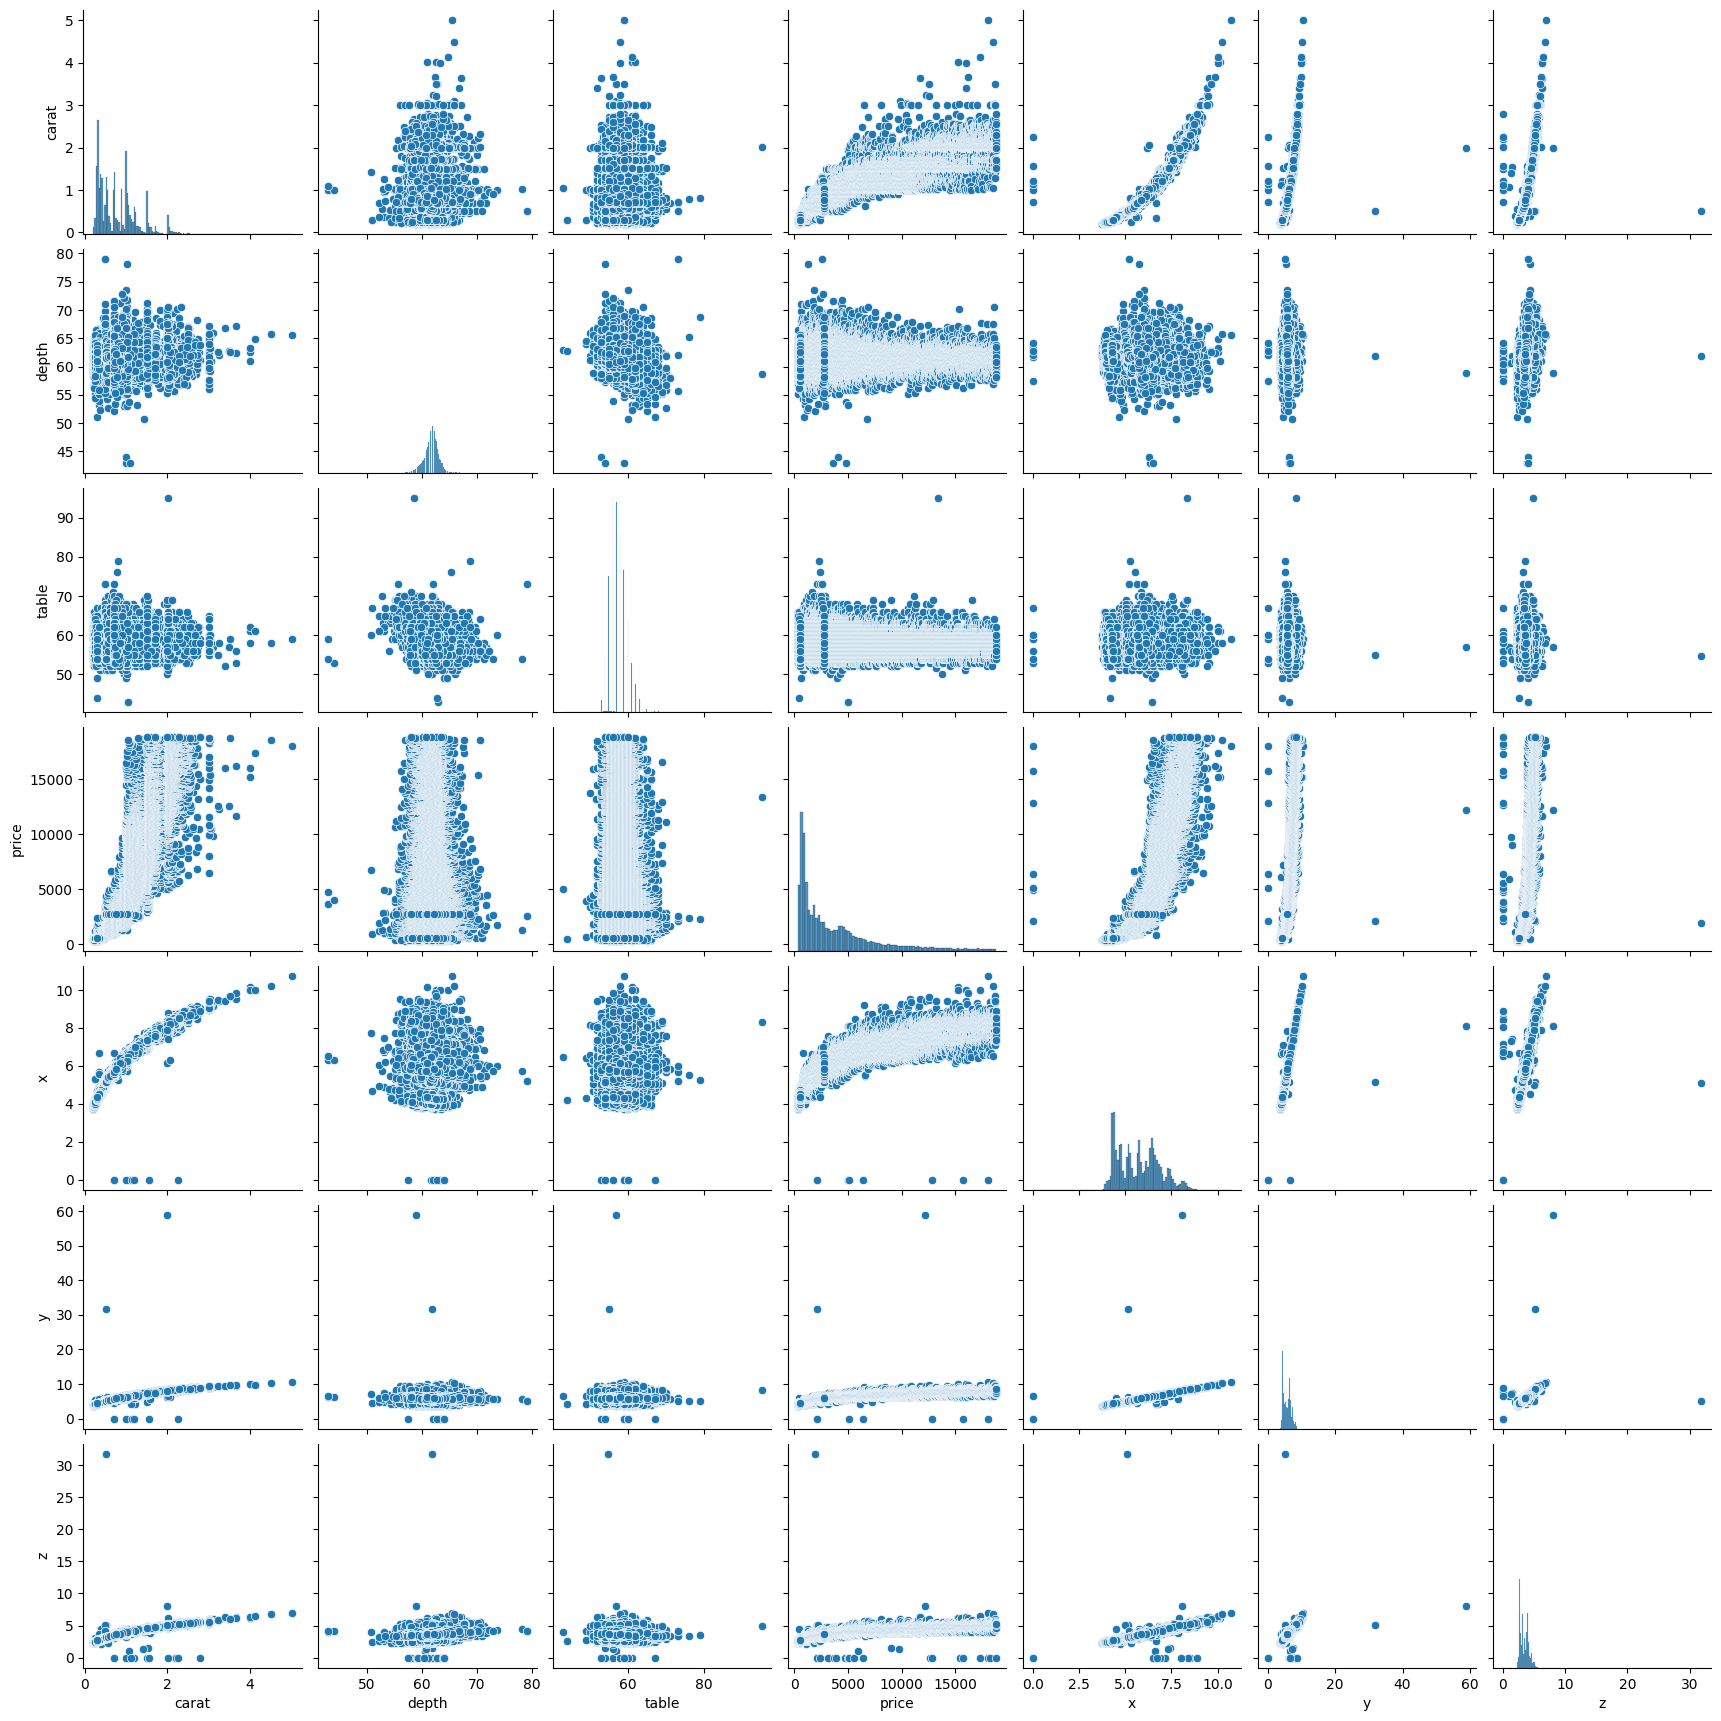

In [55]:
sns.pairplot(df)

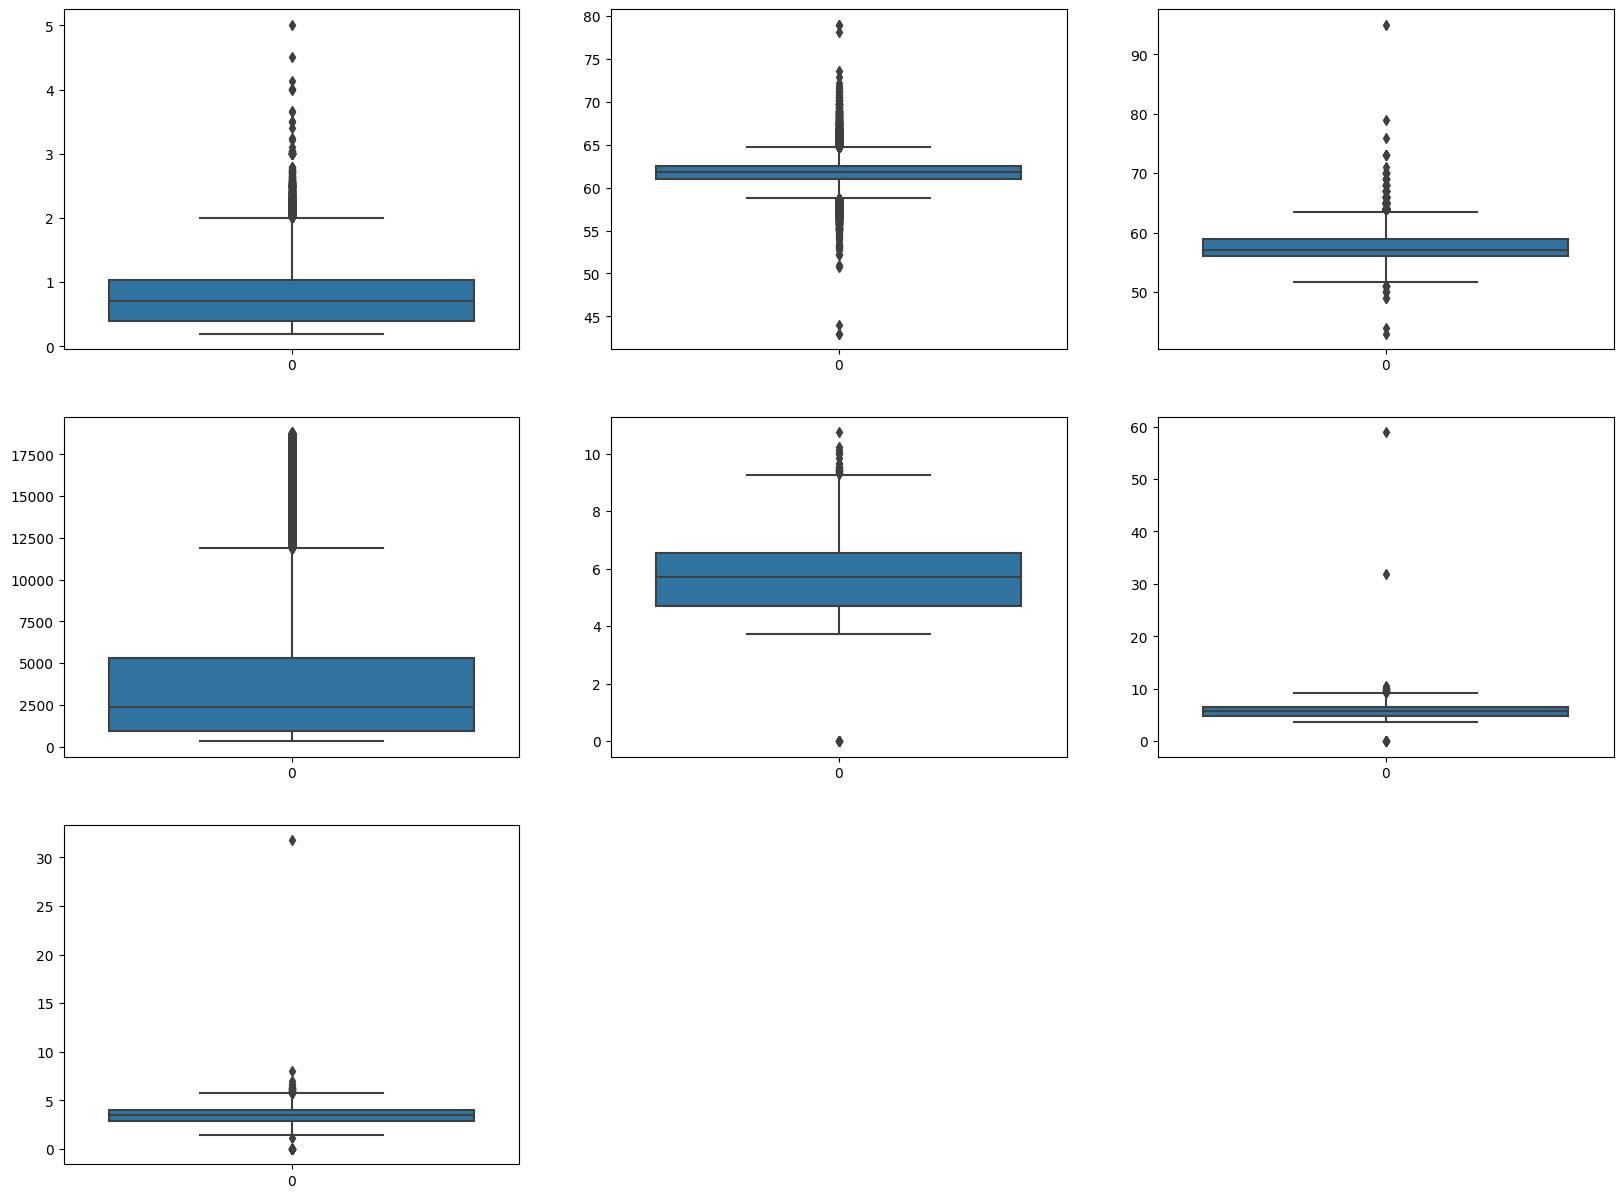

In [56]:
# plot the boxplot
plt.figure(figsize = (20, 15))

for i , col in enumerate(numerical):
    plt.subplot(3, 3, i+1)
    sns.boxplot(df[col])

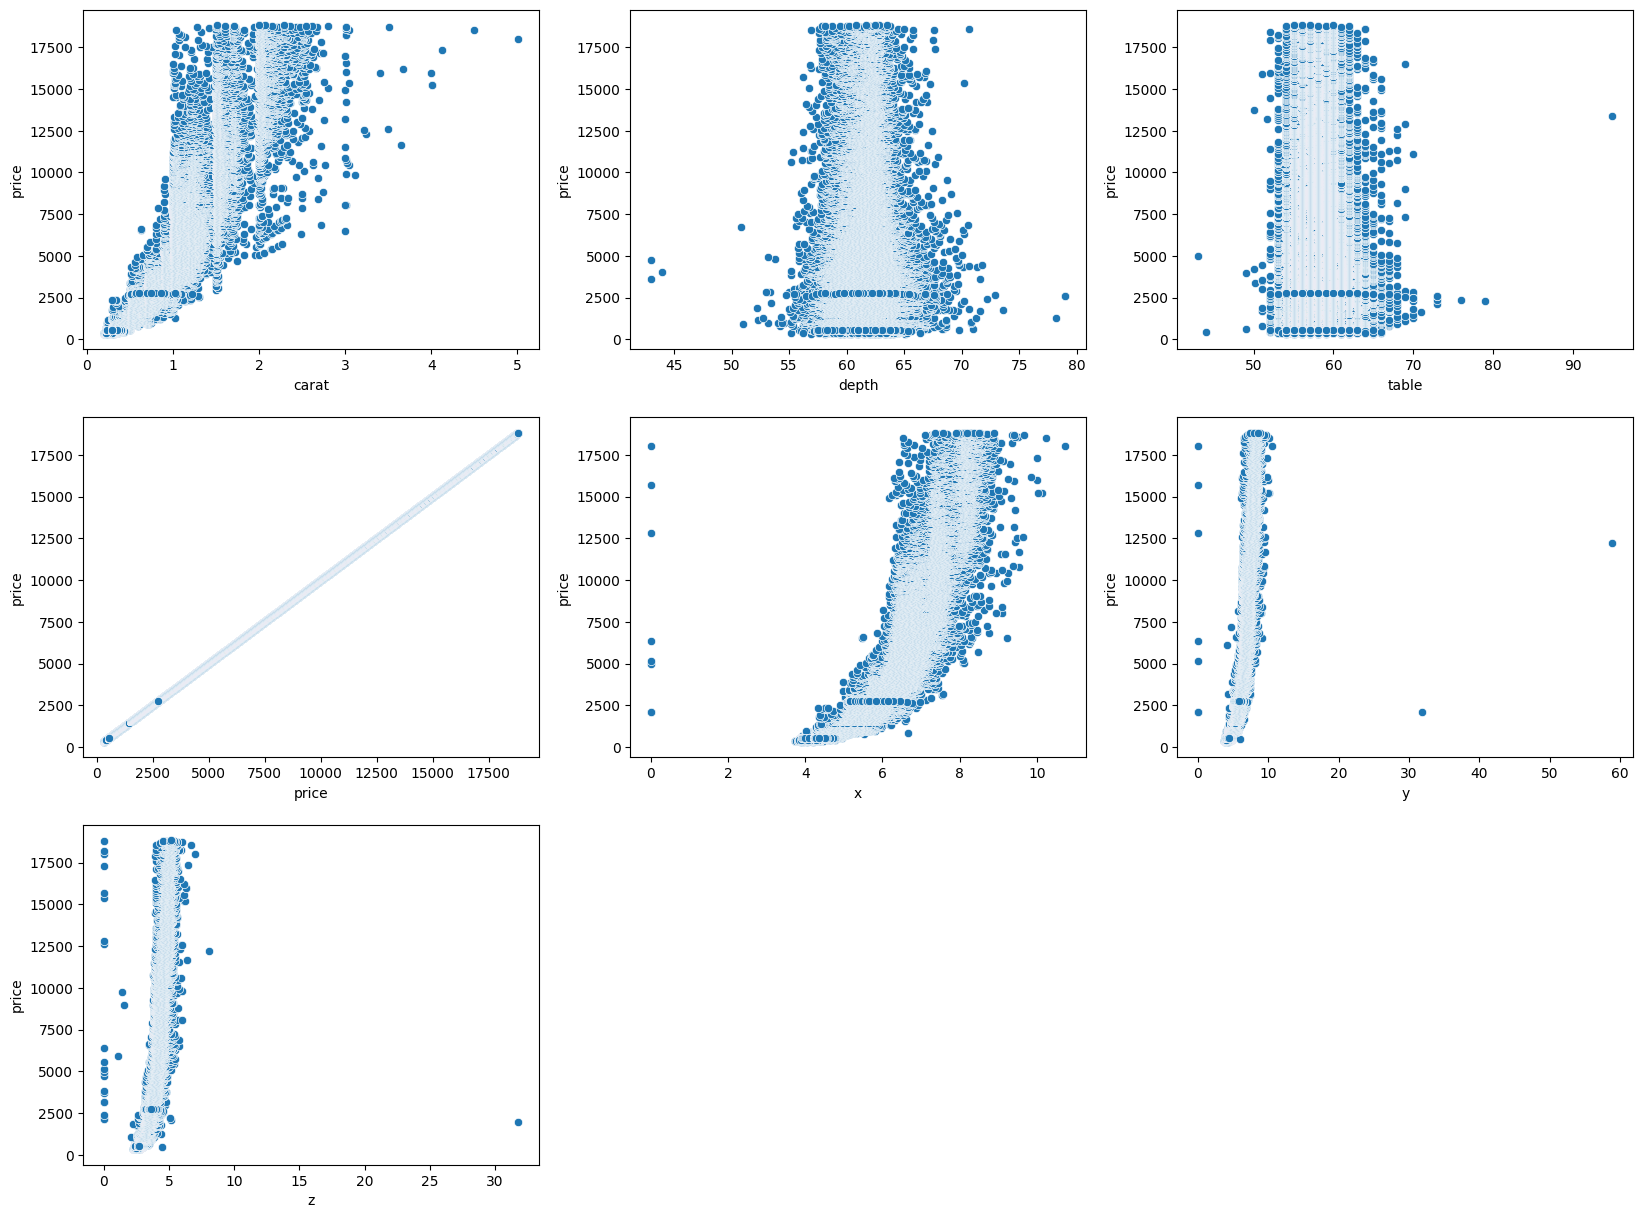

In [57]:
#scatter plot for all numeric columns
plt.figure(figsize = (20, 15))

for i , col in enumerate(numerical):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(y = df['price'], x = df[col])

In [58]:
# #count plot for all numeric columns
# plt.figure(figsize = (20, 5))

# for i , col in enumerate(categorical):
#     plt.subplot(1, 3, i+1)
#     sns.countplot(df[col])

In [59]:
# plt.figure(figsize=(10,7))
# sns.heatmap(df.corr(), data = df, annot = True, cmap = 'RdBu_r')

In [60]:
X = df.drop('price', axis = 1)
y = df['price']

In [61]:
X,y

(       carat        cut color clarity  depth  table     x     y     z
 0       0.23      Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43
 1       0.21    Premium     E     SI1   59.8   61.0  3.89  3.84  2.31
 2       0.23       Good     E     VS1   56.9   65.0  4.05  4.07  2.31
 3       0.29    Premium     I     VS2   62.4   58.0  4.20  4.23  2.63
 4       0.31       Good     J     SI2   63.3   58.0  4.34  4.35  2.75
 ...      ...        ...   ...     ...    ...    ...   ...   ...   ...
 53935   0.72      Ideal     D     SI1   60.8   57.0  5.75  5.76  3.50
 53936   0.72       Good     D     SI1   63.1   55.0  5.69  5.75  3.61
 53937   0.70  Very Good     D     SI1   62.8   60.0  5.66  5.68  3.56
 53938   0.86    Premium     H     SI2   61.0   58.0  6.15  6.12  3.74
 53939   0.75      Ideal     D     SI2   62.2   55.0  5.83  5.87  3.64
 
 [53940 rows x 9 columns],
 0         326
 1         326
 2         327
 3         334
 4         335
          ... 
 53935    2757
 53936    2757

In [62]:
#split this data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4)
print('Train Set: ', X_train.shape, y_train.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (40455, 9) (40455,)
Test Set:  (13485, 9) (13485,)


In [63]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
29703,0.40,Ideal,E,SI1,62.5,57.0,4.70,4.74,2.95
33251,0.45,Ideal,I,VS1,62.1,55.0,4.90,4.92,3.05
39576,0.42,Ideal,I,VS2,62.1,56.0,4.78,4.85,2.99
50065,0.61,Ideal,D,VS2,62.0,56.0,5.43,5.48,3.38
25803,2.33,Very Good,J,VS2,61.8,59.0,8.41,8.56,5.24


In [64]:
X_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
48479,0.56,Ideal,G,VVS2,61.2,55.0,5.35,5.37,3.28
30207,0.34,Ideal,E,SI1,60.4,57.0,4.53,4.55,2.74
6934,0.80,Ideal,F,VVS2,61.6,57.0,5.97,5.94,3.67
52520,0.70,Ideal,F,SI1,61.8,56.0,5.68,5.75,3.53
8034,0.88,Ideal,H,VVS1,62.0,59.0,6.12,6.13,3.80


## Lable Encoding

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
le = LabelEncoder()
X_train['cut']=le.fit_transform(X_train['cut'])
X_train['color']=le.fit_transform(X_train['color'])
X_train['clarity']=le.fit_transform(X_train['clarity'])

In [67]:
# label encoding the test set categorical columns
le= LabelEncoder()
X_test['cut']=le.fit_transform(X_test['cut'])
X_test['color']=le.fit_transform(X_test['color'])
X_test['clarity']=le.fit_transform(X_test['clarity'])

In [68]:
X_train.head(2)

,carat,cut,color,clarity,depth,table,x,y,z
29703,0.40,2,1,2,62.5,57.0,4.7,4.74,2.95
33251,0.45,2,5,4,62.1,55.0,4.9,4.92,3.05


In [69]:
X_test.head(2)

,carat,cut,color,clarity,depth,table,x,y,z
48479,0.56,2,3,7,61.2,55.0,5.35,5.37,3.28
30207,0.34,2,1,2,60.4,57.0,4.53,4.55,2.74


In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_rescaled = pd.DataFrame(scaler.fit_transform(X_train),
                                columns = X_train.columns,
                                index = X_train.index)
X_train_rescaled.head()

,carat,cut,color,clarity,depth,table,x,y,z
29703,-0.836762,-0.537866,-0.937955,-1.063861,0.526252,-0.204143,-0.916719,-0.884229,-0.843147
33251,-0.731614,-0.537866,1.417157,0.093664,0.246954,-1.099487,-0.738788,-0.723935,-0.699530
39576,-0.794703,-0.537866,1.417157,0.672426,0.246954,-0.651815,-0.845547,-0.786272,-0.785701
50065,-0.395141,-0.537866,-1.526734,0.672426,0.177130,-0.651815,-0.267272,-0.225242,-0.225593
25803,3.221945,1.408585,2.005935,0.672426,0.037481,0.691201,2.383893,2.517568,2.445689


In [71]:
X_test_rescaled = pd.DataFrame(scaler.transform(X_test),
                               columns = X_test.columns,
                               index = X_test.index)
X_test_rescaled.head()

,carat,cut,color,clarity,depth,table,x,y,z
48479,-0.500289,-0.537866,0.239601,1.829951,-0.381465,-1.099487,-0.338445,-0.323200,-0.369210
30207,-0.962940,-0.537866,-0.937955,-1.063861,-0.940059,-0.204143,-1.067960,-1.053429,-1.144744
6934,0.004421,-0.537866,-0.349177,1.829951,-0.102167,-0.204143,0.213140,0.184398,0.190897
52520,-0.205875,-0.537866,-0.349177,-1.063861,0.037481,-0.651815,-0.044859,0.015199,-0.010167
8034,0.172657,-0.537866,0.828379,1.251188,0.177130,0.691201,0.346588,0.353598,0.377600


### Expriment Tracking

In [72]:
import mlflow

In [73]:
mlflow.set_tracking_uri("sqlite:///mlflow.db")

mlflow.set_experiment("Diamond Price Prediction")

<Experiment: artifact_location='./mlruns/1', creation_time=1664732756361, experiment_id='1', last_update_time=1664732756361, lifecycle_stage='active', name='Diamond Price Prediction', tags={}>

In [74]:
from pickle import dump
dump(le, open('models/label_encoder.pkl', 'wb'))
dump(scaler, open('models/standard_scaler.pkl', 'wb'))


In [75]:
from sklearn import metrics


### Experiment-1 Linear Regrission

In [76]:
from sklearn.linear_model import LinearRegression


In [77]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Abdul Azad")
    mlflow.set_tag("algo", "Linear Regression")
    # log the data for each run using log_param, log_metric
    mlflow.log_param("data-path", "diamonds.csv")
    linear_regressor = LinearRegression()
    linear_regressor.fit(X_train_rescaled, y_train)
    y_test_pred = linear_regressor.predict(X_test_rescaled)
    acc = metrics.r2_score(y_test, y_test_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    mlflow.log_metric("R2 Score", acc)
    mlflow.log_metric("RMSE", rmse)
    mlflow.sklearn.log_model(linear_regressor, artifact_path = "models")
    mlflow.log_artifact("models/standard_scaler.pkl")
    mlflow.log_artifact("models/label_encoder.pkl")

### Experiment-2 KNN

In [78]:
from sklearn.neighbors import KNeighborsRegressor

In [79]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Abdul Azad")
    mlflow.set_tag("algo", "KNN")
    # log the data for each run using log_param, log_metric
    mlflow.log_param("data-path", "diamonds.csv")
    k = 6
    knn_regressor = KNeighborsRegressor(n_neighbors = k)
    knn_regressor.fit(X_train_rescaled, y_train)
    y_test_pred = knn_regressor.predict(X_test_rescaled)
    acc = metrics.r2_score(y_test, y_test_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    mlflow.log_param("n_neighbors", k)
    mlflow.log_metric("R2 Score", acc)
    mlflow.log_metric("RMSE", rmse)
    mlflow.sklearn.log_model(knn_regressor, artifact_path = "models")
    mlflow.log_artifact("models/standard_scaler.pkl")
    mlflow.log_artifact("models/label_encoder.pkl")

### Experiment-3 Decision Tree Regression

In [80]:
from sklearn.tree import DecisionTreeRegressor


In [81]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Abdul Azad")
    mlflow.set_tag("algo", "Decision Tree Regression")
    # log the data for each run using log_param, log_metric
    mlflow.log_param("data-path", "diamonds.csv")
    d = None
    dt_regressor = DecisionTreeRegressor(max_depth = d)
    dt_regressor.fit(X_train_rescaled, y_train)
    y_test_pred = dt_regressor.predict(X_test_rescaled)
    acc = metrics.r2_score(y_test, y_test_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    mlflow.log_param("max_depth", d)
    mlflow.log_metric("R2 Score", acc)
    mlflow.log_metric("RMSE", rmse)
    mlflow.sklearn.log_model(dt_regressor, artifact_path = "models")
    mlflow.log_artifact("models/standard_scaler.pkl")
    mlflow.log_artifact("models/label_encoder.pkl")

### Experiment-4 Random Forest

In [82]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Abdul Azad")
    mlflow.set_tag("algo", "Random Forest")
    # log the data for each run using log_param, log_metric
    mlflow.log_param("data-path", "diamonds.csv")
    e = 101
    rf_regressor = RandomForestRegressor(n_estimators = e)
    rf_regressor.fit(X_train_rescaled, y_train)
    y_test_pred = rf_regressor.predict(X_test_rescaled)
    acc = metrics.r2_score(y_test, y_test_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    mlflow.log_param("n_estimators", e)
    mlflow.log_metric("R2 Score", acc)
    mlflow.log_metric("RMSE", rmse)
    mlflow.sklearn.log_model(rf_regressor, artifact_path = "models")
    mlflow.log_artifact("models/standard_scaler.pkl")
    mlflow.log_artifact("models/label_encoder.pkl")

### Experiment-5 Naive Bayes

In [84]:
from sklearn.naive_bayes import GaussianNB

In [85]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Abdul Azad")
    mlflow.set_tag("algo", "GaussianNB")
    mlflow.log_param("data-path", "diamond.csv")
    nb_classifier = GaussianNB()
    nb_classifier.fit(X_train_rescaled, y_train)
    y_test_pred = nb_classifier.predict(X_test_rescaled)
    acc = metrics.accuracy_score(y_test, y_test_pred)    
    mlflow.log_metric("R2 Score", acc)
    mlflow.sklearn.log_model(nb_classifier, artifact_path="models")
    mlflow.log_artifact("models/standard_scaler.pkl")
    mlflow.log_artifact("models/label_encoder.pkl")